In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import trackpy as tp

import trackpy as tp
from skimage.measure import label, regionprops
import pandas as pd

import imageio
import numpy as np
import matplotlib.pyplot as plt

Total frames: 4599


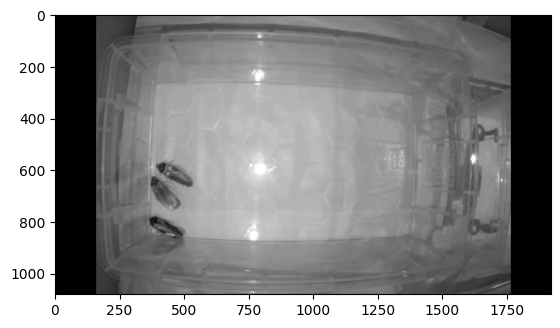

In [2]:
# Load the video
video_path = "../input_files/proof.mp4" 
reader = imageio.get_reader(video_path, 'ffmpeg')

# Check the number of frames
num_frames = reader.count_frames()
print(f"Total frames: {num_frames}")

# Extract a frame to inspect the content
frame = reader.get_data(0)
plt.imshow(frame, cmap='gray')
plt.show()


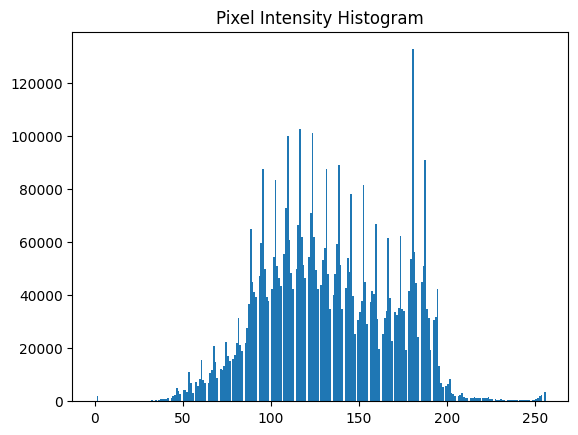

In [3]:
# Plot the histogram of pixel intensities
plt.hist(frame[frame>0].ravel(), bins=256, range=[0, 256])
plt.title("Pixel Intensity Histogram")
plt.show()

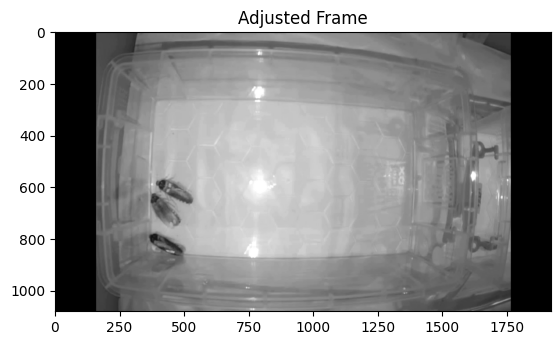

In [4]:
import cv2

def adjust_contrast_brightness(frame, alpha=1.1, beta=0):
    """ Adjust contrast (alpha) and brightness (beta) """
    new_frame = cv2.convertScaleAbs(frame, alpha=alpha, beta=beta)
    return new_frame

# Apply contrast adjustment to a frame
adjusted_frame = adjust_contrast_brightness(frame)

# Show the adjusted frame
plt.imshow(adjusted_frame, cmap='gray')
plt.title("Adjusted Frame")
plt.show()


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


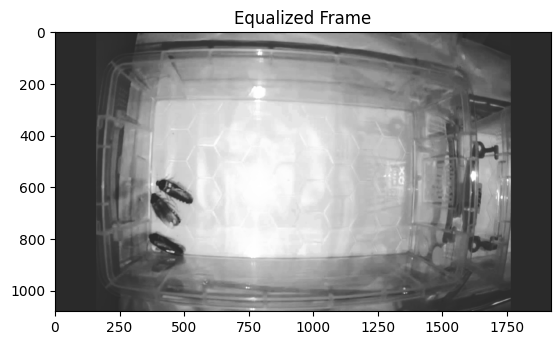

In [5]:
from skimage import exposure

# Apply histogram equalization to the frame
equalized_frame = exposure.equalize_hist(frame)

# Show the adjusted frame
plt.imshow(equalized_frame, cmap='gray')
plt.title("Equalized Frame")
plt.show()


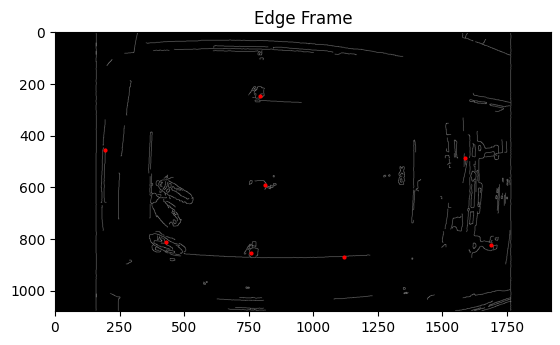

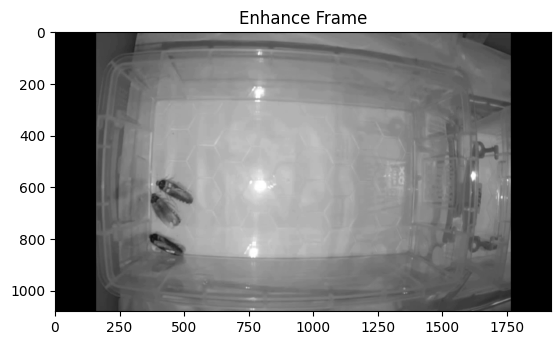

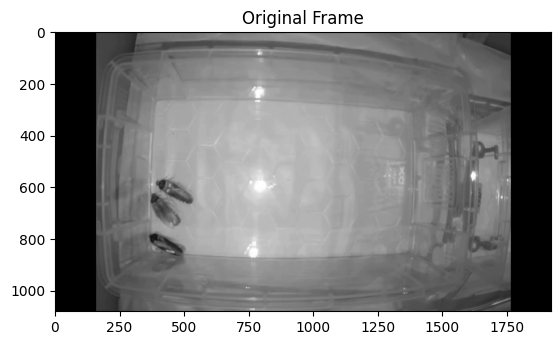

: 

In [31]:
from skimage import feature

# Function to detect edges using Canny edge detection
def apply_canny_edge_detection(frame):
    edges = feature.canny(frame, sigma=1)
    return edges

from skimage import exposure

# Function to enhance contrast
def enhance_contrast(frame):
    # Adjust contrast by scaling intensities
    return exposure.rescale_intensity(frame, in_range='image', out_range=(0, 255))

# Apply histogram equalization to the frame
edge_frame = apply_canny_edge_detection(convert_to_grayscale(frame))
enhance_frame = enhance_contrast(convert_to_grayscale(frame))

# Show the adjusted frame
plt.imshow(edge_frame, cmap='gray')
plt.plot(features['x'], features['y'], 'o', ms=2, c='red')
plt.title("Edge Frame")
plt.show()

# Show the adjusted frame
plt.imshow(enhance_frame, cmap='gray')
plt.title("Enhance Frame")
plt.show()

# Show the adjusted frame
plt.imshow(frame, cmap='gray')
plt.title("Original Frame")
plt.show()

In [25]:
print(frame[0][0][:])
print(frame[100][100][:])
print(frame[420][850][:])

print(equalized_frame[0][0][:])
print(equalized_frame[100][100][:])
print(equalized_frame[420][850][:])

print(edge_frame[0][0])
print(edge_frame[100][100])
print(edge_frame[300:500,200])

[0 0 0]
[0 0 0]
[185 185 185]
[0.16528501 0.16528501 0.16528501]
[0.16528501 0.16528501 0.16528501]
[0.9304702 0.9304702 0.9304702]
False
False
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fals

In [7]:
import numpy as np

# Convert 3D image (e.g., RGB or RGBA) to grayscale
def convert_to_grayscale(frame):
    if frame.ndim == 3:
        # If it's an RGBA image, ignore the alpha channel and take the RGB part
        frame = np.mean(frame[..., :3], axis=2).astype(np.uint8)
    return frame


In [29]:
features = tp.locate(equalized_frame, diameter=201, minmass=100)
features

features = tp.locate(edge_frame, diameter=201, minmass=100)
features

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\trackpy\feature.py:353: UserWarning: I am interpreting the image as 3-dimensional. If it is actually a 2-dimensional color image, convert it to grayscale first.
  warnings.warn("I am interpreting the image as {}-dimensional. "
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\trackpy\find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)


,y,x,mass,size,ecc,signal,raw_mass,ep
0,246.320606,792.830640,420.359244,40.447288,0.096801,0.596210,425.0,0.0
1,453.532492,192.044529,582.143894,64.063981,0.358128,0.588365,589.0,0.0
2,485.768843,1587.930581,1131.394269,66.672262,0.280914,0.638049,1144.0,0.0
3,589.012097,812.048280,269.565250,62.699579,0.703649,0.564830,272.0,0.0
4,812.335690,431.473492,1285.851815,55.550881,0.132555,0.666814,1298.0,0.0
5,821.586998,1688.795143,769.819213,64.398517,0.377939,0.619744,779.0,0.0
6,852.316084,758.681641,467.836367,44.201309,0.143322,0.609285,472.0,0.0
7,868.150425,1119.519240,197.687982,56.832440,0.968683,0.447157,200.0,0.0


In [27]:
features = tp.locate(convert_to_grayscale(equalized_frame), diameter=501, minmass=200)
features

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\trackpy\find.py:119: UserWarning: Image contains no local maxima.
  warnings.warn("Image contains no local maxima.", UserWarning)


,y,x,mass,size,ecc,signal,raw_mass


In [23]:
# Placeholder for tracking results
tracking_results = []

# Loop through each frame and detect cockroaches
for frame_idx in range(200):  # num_frames
    # Extract the current frame
    frame = reader.get_data(frame_idx)

    # Use Trackpy to locate the cockroaches
    features = tp.locate(frame, diameter=21, minmass=100)

    # Use skimage to measure the orientation of each detected cockroach
    labeled_frame = label(frame < 50)  # Simple thresholding
    regions = regionprops(labeled_frame)

    for region in regions:
        # If the region is large enough to be considered a cockroach
        if region.area > 100:
            x, y = region.centroid  # Centroid of the cockroach
            orientation = region.orientation  # Orientation of the cockroach
            tracking_results.append({
                "cockroach_id": region.label,
                "time": frame_idx,
                "position_x": x,
                "position_y": y,
                "orientation": orientation
            })

# Convert results to a pandas DataFrame
df_cockroach_tracking = pd.DataFrame(tracking_results)

# Display the first few rows of the DataFrame
print(df_cockroach_tracking.head())


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\trackpy\feature.py:353: UserWarning: I am interpreting the image as 3-dimensional. If it is actually a 2-dimensional color image, convert it to grayscale first.
  warnings.warn("I am interpreting the image as {}-dimensional. "
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\trackpy\find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)


ValueError: too many values to unpack (expected 2)

TypeError: Image data of dtype object cannot be converted to float

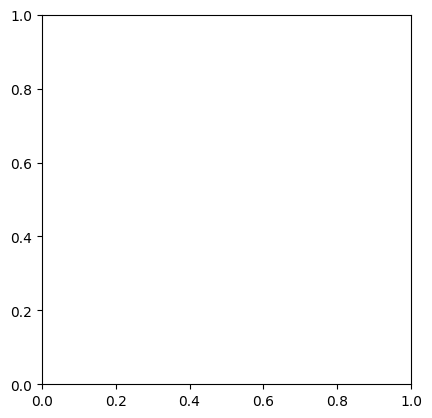

In [7]:
from skimage import exposure

# Apply histogram equalization to the frame
frame
#equalized_frame = exposure.equalize_hist(frame)

# Show the adjusted frame
#plt.imshow(equalized_frame, cmap='gray')
plt.imshow(frame)
#plt.title("Equalized Frame")
plt.show()

   cockroach_id  time   position_x  position_y
0             1     0  1242.000000  359.500000
1             2     0    97.912763   88.308966
2             5     0    94.859466  176.624855
3            13     0   353.149123  518.078947
4             1     1  1242.000000  359.500000


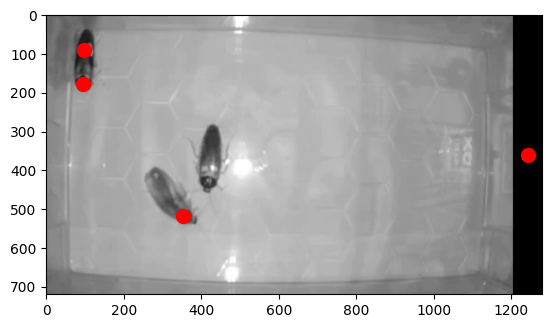

In [1]:
import imageio
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Load the video
video_path = '../input_files/proof_2.mp4'
reader = imageio.get_reader(video_path)

# Initialize an empty list to store tracking results
tracking_results = []

# Define a function to process each frame
def process_frame(frame, frame_idx):
    # Convert to grayscale (if not already grayscale)
    if len(frame.shape) == 3:
        gray_frame = rgb2gray(frame)
    else:
        gray_frame = frame
    
    # Apply a threshold to isolate dark objects (cockroaches)
    thresh_value = 50 / 255  # Corresponds to (40, 40, 40) in RGB (normalized to 0-1 scale)
    binary_frame = gray_frame < thresh_value  # Cockroaches are dark, so we threshold low

    # Label connected regions (potential cockroaches)
    labeled_frame = label(binary_frame)
    
    # Analyze labeled regions to find centroids (potential cockroach positions)
    for region in regionprops(labeled_frame):
        # Only consider regions with a large enough area (to exclude noise)
        if region.area >= 100:  # Adjust the area threshold based on the size of the cockroaches
            centroid = region.centroid
            tracking_results.append({
                "cockroach_id": region.label,  # Assign each region a unique label
                "time": frame_idx,
                "position_x": centroid[1],  # Note: centroid[1] is x, centroid[0] is y
                "position_y": centroid[0]
            })

# Process each frame of the video
for frame_idx, frame in enumerate(reader):
    process_frame(frame, frame_idx)

# Convert the results to a pandas DataFrame
df_tracking = pd.DataFrame(tracking_results)

# Show the first few rows of the tracking DataFrame
print(df_tracking.head())

# Save the tracking results to a CSV file
df_tracking.to_csv('cockroach_tracking_results.csv', index=False)

# Optional: Plot one of the frames with the tracked cockroach positions
frame_sample = reader.get_data(0)  # Get the first frame for example
plt.imshow(frame_sample, cmap='gray')
for index, row in df_tracking[df_tracking['time'] == 0].iterrows():
    plt.scatter(row['position_x'], row['position_y'], color='red', s=100)
plt.show()


   cockroach_id  time   position_x  position_y  orientation
0             1     0  1239.500000  359.500000     0.000000
1             2     0    97.912763   88.308966    -7.799504
2             3     0    94.859466  176.624855    58.668537
3             4     1  1239.500000  359.500000     0.000000
4             5     1    97.906602   88.372786    -7.796257


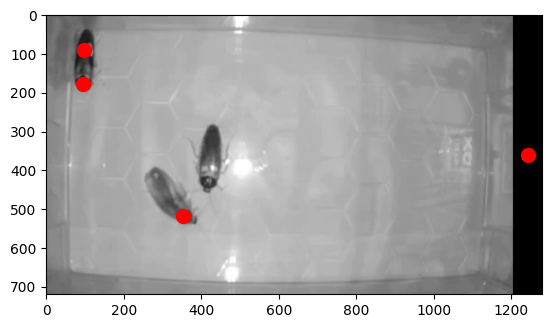

In [3]:
import cv2
import numpy as np
import pandas as pd
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage import io

# Load the video and convert frames to grayscale
video_path = '../input_files/proof_2.mp4'
cap = cv2.VideoCapture(video_path)

# Predefined variables
cockroach_color = (40, 40, 40)
ignore_x_region = 1200  # x-axis limit to ignore black stripe
cockroach_size_threshold = 500  # Adjust based on actual size in pixels
tracking_data = []

frame_id = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Ignore black region on the x-axis
    gray_frame[:, ignore_x_region:] = 0

    # Threshold the frame to find cockroaches (dark regions)
    _, thresh_frame = cv2.threshold(gray_frame, 50, 255, cv2.THRESH_BINARY_INV)

    # Label the regions (connected components)
    labeled_frame = label(thresh_frame)

    # Get properties of labeled regions
    props = regionprops(labeled_frame)

    # Track each region (cockroach)
    for region in props:
        if region.area > cockroach_size_threshold:
            y, x = region.centroid
            orientation = region.orientation  # Orientation in radians

            # If frame_id is 0, adjust the ID and position of cockroach 2
            if frame_id == 0:
                if 400 < x < 420 and 390 < y < 410:
                    cockroach_id = 2  # Manually assign ID
                else:
                    cockroach_id = len(tracking_data) + 1
            else:
                cockroach_id = len(tracking_data) + 1
            
            # Save tracking data
            tracking_data.append([cockroach_id, frame_id, x, y, np.degrees(orientation)])

    frame_id += 1

cap.release()

# Convert tracking data to DataFrame
df_cockroaches = pd.DataFrame(tracking_data, columns=['cockroach_id', 'time', 'position_x', 'position_y', 'orientation'])

# Correct the cockroach ID at time=0 for overlap
df_cockroaches.loc[(df_cockroaches['time'] == 0) & (df_cockroaches['cockroach_id'] == 5), 'cockroach_id'] = 2

# Save to CSV
df_cockroaches.to_csv('cockroach_tracking.csv', index=False)

print(df_cockroaches.head())

# Optional: Plot one of the frames with the tracked cockroach positions
frame_sample = reader.get_data(0)  # Get the first frame for example
plt.imshow(frame_sample, cmap='gray')
for index, row in df_tracking[df_tracking['time'] == 0].iterrows():
    plt.scatter(row['position_x'], row['position_y'], color='red', s=100)
plt.show()
